# 第5章: 係り受け解析

日本語Wikipediaの「人工知能」に関する記事からテキスト部分を抜き出したファイルがai.ja.zipに収録されている． この文章をCaboChaやKNP等のツールを利用して係り受け解析を行い，その結果をai.ja.txt.parsedというファイルに保存せよ．このファイルを読み込み，以下の問に対応するプログラムを実装せよ。

In [ ]:
!wget https://nlp100.github.io/data/ai.ja.zip
!unzip ai.ja.zip

--2021-04-30 03:12:36--  https://nlp100.github.io/data/ai.ja.zip
Resolving nlp100.github.io (nlp100.github.io)... 185.199.111.153, 185.199.110.153, 185.199.109.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17516 (17K) [application/zip]
Saving to: ‘ai.ja.zip.1’

ai.ja.zip.1         100%[===================>]  17.11K  --.-KB/s    in 0.001s  

2021-04-30 03:12:36 (32.8 MB/s) - ‘ai.ja.zip.1’ saved [17516/17516]

Archive:  ai.ja.zip
replace ai.ja.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!cabocha -f1 ai.ja.txt > ai.ja.txt.parsed

In [283]:
!head -n 50 ai.ja.txt.parsed

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS
* 0 17D 1/1 0.388993
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 0.613549
（	記号,括弧開,*,*,*,*,（,（,（
じん	名詞,一般,*,*,*,*,じん,ジン,ジン
こうち	名詞,一般,*,*,*,*,こうち,コウチ,コーチ
のう	助詞,終助詞,*,*,*,*,のう,ノウ,ノー
、	記号,読点,*,*,*,*,、,、,、
、	記号,読点,*,*,*,*,、,、,、
* 2 3D 0/0 0.758984
AI	名詞,一般,*,*,*,*,*
* 3 17D 1/5 0.517898
〈	記号,括弧開,*,*,*,*,〈,〈,〈
エーアイ	名詞,固有名詞,一般,*,*,*,*
〉	記号,括弧閉,*,*,*,*,〉,〉,〉
）	記号,括弧閉,*,*,*,*,）,）,）
と	助詞,格助詞,引用,*,*,*,と,ト,ト
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
* 4 5D 2/2 1.035972
「	記号,括弧開,*,*,*,*,「,「,「
『	記号,括弧開,*,*,*,*,『,『,『
計算	名詞,サ変接続,*,*,*,*,計算,ケイサン,ケイサン
* 5 9D 0/3 1.243687
（	記号,括弧開,*,*,*,*,（,（,（
）	記号,括弧閉,*,*,*,*,）,）,）
』	記号,括弧閉,*,*,*,*,』,』,』
という	助詞,格助詞,連語,*,*,*,という,トイウ,トユウ
* 6 9D 0/1 0.691934
概念	名詞,一般,*,*,*,*,概念,ガイネン,ガイネン
と	助詞,並立助詞,*,*,*,*,と,ト,ト
* 7 8D 1/1 1.048596
『	記号,括弧開,*,*,*,*,『,『,『
コンピュータ	名詞,一般,*,*,*,*,コンピュータ,コンピュータ,コンピュータ
* 8 9D 0/3 1.540775
（	記号,括弧開,*,*,*,*,（,（,（
）	記号,括弧閉,*,*,*,*,）,）

## 40. 係り受け解析結果の読み込み（形態素）

形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [22]:
class Morph:
  def __init__(self, surface, base, pos, pos1):
    self.surface = surface
    self.base = base
    self.pos = pos
    self.pos1 = pos1
  def printMorph(self):
    print("surface: " + self.surface + " base: " + self.base + " pos: "+self.pos+" po1: "+self.pos1)

In [23]:
with open("ai.ja.txt.parsed",'r') as ai:
  text = ai.read()
# split text into paragraphs with EOS
paragraphs = text.split('EOS')
paragraphs.remove('\n')
morphs_file = []
indices_file = []
for paragraph in paragraphs:
  # split paragraphs into sentences with 。
  sentences = paragraph.split('。')
  for sentence in sentences:
    morphs_sentence = []
    indices_sentence = []
    # split sentences into words with \n
    words = sentence.split('\n')
    if len(words) > 1:
      for word in words:
        if len(word) >= 1 and word[0] != '*':
          word0, word1 = word.split()[0], word.split()[1]
          word1_splitted = word1.split(',')
          morphs_sentence.append(Morph(word0, word1_splitted[6], word1_splitted[0], word1_splitted[1]))
        else:
          indices_sentence.append(word)
      if len(morphs_sentence) > 0:
        morphs_file.append(morphs_sentence)
        indices_sentence.remove('')
        indices_file.append(indices_sentence)

# Print first sentence
for morph in morphs_file[1][:17]:
  morph.printMorph()
#   print("surface: " + morph.surface + " base: " + morph.base + " pos: "+morph.pos+" po1: "+morph.pos1)

surface: 人工 base: 人工 pos: 名詞 po1: 一般
surface: 知能 base: 知能 pos: 名詞 po1: 一般
surface: （ base: （ pos: 記号 po1: 括弧開
surface: じん base: じん pos: 名詞 po1: 一般
surface: こうち base: こうち pos: 名詞 po1: 一般
surface: のう base: のう pos: 助詞 po1: 終助詞
surface: 、 base: 、 pos: 記号 po1: 読点
surface: 、 base: 、 pos: 記号 po1: 読点
surface: AI base: * pos: 名詞 po1: 一般
surface: 〈 base: 〈 pos: 記号 po1: 括弧開
surface: エーアイ base: * pos: 名詞 po1: 固有名詞
surface: 〉 base: 〉 pos: 記号 po1: 括弧閉
surface: ） base: ） pos: 記号 po1: 括弧閉
surface: と base: と pos: 助詞 po1: 格助詞
surface: は base: は pos: 助詞 po1: 係助詞
surface: 、 base: 、 pos: 記号 po1: 読点
surface: 「 base: 「 pos: 記号 po1: 括弧開


## 41. 係り受け解析結果の読み込み（文節・係り受け）

40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [24]:
class Chunk:
  def __init__(self, morphs, dst, srcs):
    self.morphs = morphs
    self.dst = dst
    self.srcs = srcs
  
  def getPhrase(self):
    phrase = ''
    for morph in self.morphs:
      phrase += morph.surface
    return phrase
  
  def printChunk(self):
    phrase = self.getPhrase()
    print("dst: ", self.dst, "srcs: ", self.srcs, " Phrase: ", phrase)

In [25]:
with open("ai.ja.txt.parsed",'r') as ai:
  text = ai.read()
# split text into paragraphs with EOS
paragraphs = text.split('EOS')
paragraphs.remove('\n')
f = []
morphs_file1 = []
indices_file = []
morphs_phrase = []
morphs_sentence = []
for paragraph in paragraphs:
  # split paragraphs into sentences with 。
  sentences = paragraph.split('。')
  for sentence in sentences:
    i = 0
    morphs_sentence = []
    indices_sentence = []
    # split sentences into words with \n
    words = sentence.split('\n')
    if len(words) > 1:
      for word in words:
        # use string with * to divide between phrases in sentence
        if word == '' or word[0] == '*':
            if morphs_phrase != []:
              morphs_sentence.append(morphs_phrase)
            morphs_phrase = []
            if word != '':
              indices_sentence.append(word)
        elif len(word) >= 1:
            word0, word1 = word.split()[0], word.split()[1]
            word1_splitted = word1.split(',')
            morphs_phrase.append(Morph(word0, word1_splitted[6], word1_splitted[0], word1_splitted[1]))
    if len(morphs_sentence) > 0:
      morphs_file1.append(morphs_sentence)
      indices_file.append(indices_sentence)

# for morph in morphs_file[1][0]:
#   print("surface: " + morph.surface + " base: " + morph.base + " pos: "+morph.pos+" po1: "+morph.pos1)

In [26]:
index_sentence = indices_file[1] + indices_file[2]
dst = []
srcs = {}
morphs_id = {}
[srcs.setdefault(x, []) for x in range(-1,100)]
for index_word in index_sentence:
  id_split = index_word.split()
  dest = int(id_split[2].replace('D',''))
  source = int(id_split[1])
  dst.append(dest)
  srcs[dest].append(source)

# print("dst: ", dst)
# print("srcs: ", srcs)

In [27]:
i = 0
chunks_sentence12= []
for phrase in morphs_file1[1] + morphs_file1[2]:
  chunks_sentence12.append(Chunk(phrase, dst[i], srcs[i]))
  Chunk(phrase, dst[i], srcs[i]).printChunk()
  i += 1

dst:  17 srcs:  []  Phrase:  人工知能
dst:  17 srcs:  []  Phrase:  （じんこうちのう、、
dst:  3 srcs:  []  Phrase:  AI
dst:  17 srcs:  [2]  Phrase:  〈エーアイ〉）とは、
dst:  5 srcs:  []  Phrase:  「『計算
dst:  9 srcs:  [4]  Phrase:  （）』という
dst:  9 srcs:  []  Phrase:  概念と
dst:  8 srcs:  []  Phrase:  『コンピュータ
dst:  9 srcs:  [7]  Phrase:  （）』という
dst:  10 srcs:  [5, 6, 8]  Phrase:  道具を
dst:  12 srcs:  [9]  Phrase:  用いて
dst:  12 srcs:  []  Phrase:  『知能』を
dst:  13 srcs:  [10, 11]  Phrase:  研究する
dst:  14 srcs:  [12]  Phrase:  計算機科学
dst:  15 srcs:  [13]  Phrase:  （）の
dst:  16 srcs:  [14]  Phrase:  一分野」を
dst:  17 srcs:  [15]  Phrase:  指す
dst:  34 srcs:  [0, 1, 3, 16]  Phrase:  語
dst:  20 srcs:  []  Phrase:  「言語の
dst:  20 srcs:  []  Phrase:  理解や
dst:  21 srcs:  [18, 19]  Phrase:  推論、
dst:  22 srcs:  [20]  Phrase:  問題解決などの
dst:  24 srcs:  [21]  Phrase:  知的行動を
dst:  24 srcs:  []  Phrase:  人間に
dst:  26 srcs:  [22, 23]  Phrase:  代わって
dst:  26 srcs:  []  Phrase:  コンピューターに
dst:  27 srcs:  [24, 25]  Phrase:  行わせる
dst:  34 srcs:

## 42. 係り元と係り先の文節の表示

係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [28]:
with open("ai.ja.txt.parsed",'r') as ai:
  text = ai.read()
# split text into paragraphs with EOS
paragraphs = text.split('EOS')
paragraphs.remove('\n')
morphs_file = []
indices_file = []
morphs_phrase = []
morphs_sentence = []
for paragraph in paragraphs:
  # split paragraphs into sentences with 。
  sentences = paragraph.split('。')
  for sentence in sentences:
    i = 0
    morphs_sentence = []
    indices_sentence = []
    # split sentences into words with \n
    words = sentence.split('\n')
    if len(words) > 1:
      for word in words:
        # use string with * to divide between phrases in sentence
        if word == '' or word[0] == '*':
            if morphs_phrase != []:
              morphs_sentence.append(morphs_phrase)
            morphs_phrase = []
            if word != '':
              indices_sentence.append(word)
        elif len(word) >= 1:
            word0, word1 = word.split()[0], word.split()[1]
            word1_splitted = word1.split(',')
            if word1_splitted[0] != '記号':
              morphs_phrase.append(Morph(word0, word1_splitted[6], word1_splitted[0], word1_splitted[1]))
    if len(morphs_sentence) > 0:
      morphs_file.append(morphs_sentence)
      indices_file.append(indices_sentence)

index_sentence = indices_file[1] + indices_file[2]
# print(index_sentence)
dst = []
srcs = {}
morphs_id = {}
[srcs.setdefault(x, []) for x in range(-1,100)]
for index_word in index_sentence:
  id_split = index_word.split()
  dest = int(id_split[2].replace('D',''))
  source = int(id_split[1])
  dst.append(dest)
  srcs[dest].append(source)
  
i = 0
chunks_sentence12 = []
for phrase in morphs_file[1]+morphs_file[2]:
  chunks_sentence12.append(Chunk(phrase, dst[i], srcs[i]))
#   Chunk(phrase, dst[i], srcs[i]).printChunk()
  i += 1

In [29]:
for chunk in chunks_sentence12:
  print("{0}\t{1}".format(chunk.getPhrase(), chunks_sentence12[chunk.dst].getPhrase()))

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される
される	される


## 43. 名詞を含む文節が動詞を含む文節に係るものを抽出

名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ

In [30]:
for chunk in chunks_sentence12:
  dest_chunk = chunks_sentence12[chunk.dst]
  for morph in chunk.morphs:
    if morph.pos == '名詞':
      for dest_morph in dest_chunk.morphs:
        if dest_morph.pos == '動詞':
          print("{0}\t{1}".format(chunk.getPhrase(), chunks_sentence12[chunk.dst].getPhrase()))
          break
        else:
          continue
      break

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


## 44. 係り受け木の可視化

与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい．

In [227]:
from graphviz import Digraph
dot = Digraph(format='png')
for i, chunk in enumerate(chunks_sentence12):
  dot.node(str(i), chunk.getPhrase())

for i, chunk in enumerate(chunks_sentence12):
  for l in chunk.srcs:
    dot.edge(str(i),str(l),constraint='false')
# with open('nodetree.dot','w') as nodetree:
#   nodetree.write(dot.source)
# print(dot.source)
dot.render("nodetree")

'nodetree.png'

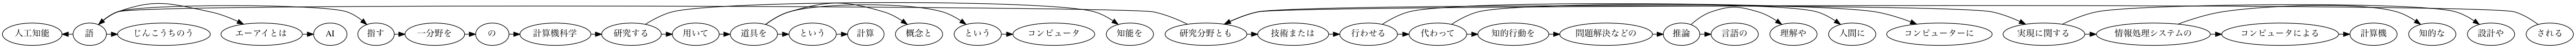

In [32]:
from IPython.display import Image,display_png
display_png(Image('nodetree.png'))

## 45. 動詞の格パターンの抽出

今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

動詞を含む文節において，最左の動詞の基本形を述語とする
述語に係る助詞を格とする
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

作り出す	で は を
このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

コーパス中で頻出する述語と格パターンの組み合わせ
「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [33]:
def printArticle(chunk):
  for morph in chunk.morphs:
    if morph.pos == '助詞':
      print(morph.base, end=' ')

In [34]:
for i, chunk in enumerate(chunks_sentence12):
  for morph in chunk.morphs:
    if morph.pos == '動詞'and morph.pos1 != '接尾':
      print(morph.base, end='\t')
      for src in srcs[i]:
        printArticle(chunks_sentence12[src])
      print()

用いる	を 
する	て を 
指す	を 
代わる	を に 
行う	て に 
する	と も 


## 46. 動詞の格フレーム情報の抽出

45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

作り出す	で は を	会議で ジョンマッカーシーは 用語を

In [35]:
for i, chunk in enumerate(chunks_sentence12):
  for morph in chunk.morphs:
    if morph.pos == '動詞'and morph.pos1 != '接尾':
      print(morph.base, end='\t')
      for src in srcs[i]:
        printArticle(chunks_sentence12[src])
      for src in srcs[i]:
        print(chunks_sentence12[src].getPhrase(), end=' ')
      print()

用いる	を 道具を 
する	て を 用いて 知能を 
指す	を 一分野を 
代わる	を に 知的行動を 人間に 
行う	て に 代わって コンピューターに 
する	と も 研究分野とも 


## 47. 機能動詞構文のマイニング

動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）
例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．

学習を行う	に を	元に 経験を

In [171]:
paragraph_no = 1
sentence_num = len(paragraphs[paragraph_no].split('。	記号'))
# print(sentence_num)
start_line = 0
end_line = start_line + sentence_num
index_sentence = []
for index in indices_file[start_line:top_line]:
  index_sentence.extend(index)
dst_top = []
srcs_top = {}
morphs_id = {}
[srcs_top.setdefault(x, set()) for x in range(-1,100)]
for index_word in index_sentence:
  id_split = index_word.split()
  dest = int(id_split[2].replace('D',''))
  source = int(id_split[1])
  dst_top.append(dest)
  srcs_top[dest].add(source)

# print("dst: ", dst)
# print("srcs: ", srcs_top)

In [156]:
i = 0
chunks_sentence_top= []
morphs_top = []
for x in morphs_file[1:top_line]:
  morphs_top.extend(x)
for phrase in morphs_top:
  chunks_sentence_top.append(Chunk(phrase, dst_top[i], srcs_top[i]))
#   Chunk(phrase, dst[i], srcs[i]).printChunk()
  i += 1

In [170]:
def printArticleSet(chunk):
  articles = set()
  for morph in chunk.morphs:
    if morph.pos == '助詞':
      print(morph.base, end=' ')
      
def containsVerb(chunk):
  check = False
  for morph in chunk.morphs:
    if morph.pos == '動詞':
      check = True
      print(morph.base, end='\t')
  return check

In [172]:
for i, chunk in enumerate(chunks_sentence_top):
  check = False
  for j, morph in enumerate(chunk.morphs):
    if j < len(chunk.morphs)-1:
      if morph.pos1 == 'サ変接続' and chunk.morphs[j+1].base == 'を':
        print(morph.base, end='')
        print(chunk.morphs[j+1].base, end='')
        for k in range(i+1,i+10):
          if containsVerb(chunks_sentence_top[k]):
            break
        for src in srcs_top[i]:
          printArticleSet(chunks_sentence_top[src])
        for src in srcs_top[i]:
          print(chunks_sentence_top[src].getPhrase(), end=' ')
        print()

行動を代わる	など の 問題解決などの 


## 48. 名詞から根へのパスの抽出

文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

各文節は（表層形の）形態素列で表現する
パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

ジョンマッカーシーは -> 作り出した
AIに関する -> 最初の -> 会議で -> 作り出した
最初の -> 会議で -> 作り出した
会議で -> 作り出した
人工知能という -> 用語を -> 作り出した
用語を -> 作り出した
KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．

ジョンマッカーシーは -> 作り出した
ＡＩに -> 関する -> 会議で -> 作り出した
会議で -> 作り出した
人工知能と -> いう -> 用語を -> 作り出した
用語を -> 作り出した

In [247]:
def containsPOS(chunk, pos):
  strnoun = ''
  check = False
  for morph in chunk.morphs:
    if morph.pos == pos:
      strnoun += morph.surface
      check = True
  if check:
    noun.append(strnoun)
  return check
def printRoot(chunk, chunks_sentence):
  global lstRoot
  lstRoot.append(chunk.getPhrase())
  print(chunk.getPhrase(), end='')
  if chunk.dst != -1:
    print(' -> ',end='')
    nextchunk = chunks_sentence[chunk.dst]
    printRoot(nextchunk, chunks_sentence)
  else:
    lstPhraseRoot.append(lstRoot)
    lstRoot = []
    print('')
    return

In [248]:
lstRoot = []
lstPhraseRoot = []
nounPhrase = []
noun = []
for chunk in chunks_sentence12:
  if containsPOS(chunk, '名詞'):
    nounPhrase.append(chunk)
    printRoot(chunk, chunks_sentence12)

人工知能 -> 語 -> 研究分野とも -> される
じんこうちのう -> 語 -> 研究分野とも -> される
AI -> エーアイとは -> 語 -> 研究分野とも -> される
エーアイとは -> 語 -> 研究分野とも -> される
計算 -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
コンピュータ -> という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
道具を -> 用いて -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
知能を -> 研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
研究する -> 計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
計算機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される
一分野を -> 指す -> 語 -> 研究分野とも -> される
語 -> 研究分野とも -> される
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または -> 研究

## 49. 名詞間の係り受けパスの抽出

文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がi
とj
（i<j
）のとき，係り受けパスは以下の仕様を満たすものとする．

問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
文節i
とj
に含まれる名詞句はそれぞれ，XとYに置換する
また，係り受けパスの形状は，以下の2通りが考えられる．

文節i
から構文木の根に至る経路上に文節j
が存在する場合: 文節i
から文節j
のパスを表示
上記以外で，文節i
と文節j
から構文木の根に至る経路上で共通の文節k
で交わる場合: 文節i
から文節k
に至る直前のパスと文節j
から文節k
に至る直前までのパス，文節k
の内容を” | “で連結して表示
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを | 作り出した
Xという -> Yを
KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．

Xは | Yに -> 関する -> 会議で | 作り出した。
Xは | Yで | 作り出した。
Xは | Yと -> いう -> 用語を | 作り出した。
Xは | Yを | 作り出した。
Xに -> 関する -> Yで
Xに -> 関する -> 会議で | Yと -> いう -> 用語を | 作り出した。
Xに -> 関する -> 会議で | Yを | 作り出した。
Xで | Yと -> いう -> 用語を | 作り出した。
Xで | Yを | 作り出した。
Xと -> いう -> Yを

In [280]:
rootmixed = []
for i, chunk in enumerate(nounPhrase):
  for j, chunk2 in enumerate(nounPhrase):
    if chunk == chunk2:
      break
    else:
      list1 = lstPhraseRoot[i]
      list2 = lstPhraseRoot[j]
      intersect = [x for x in list1 if x in list2]
      diff1 = [x for x in list1 if x not in intersect]
      diff2 = [x for x in list2 if x not in intersect]
      str1 = " -> ".join(x for x in diff1)
      str2 = " -> ".join(x for x in diff2)
      strmx = " | ".join([str2, str1]).replace(noun[j],'X').replace(noun[i],'Y')  
      strdiff = " -> ".join(x for x in intersect)
      strfinal = " -> ".join([strmx, strdiff])
      rootmixed.append(strfinal)
rootmixed[:10]

['X | Yのう -> 語 -> 研究分野とも -> される',
 'X | Y -> エーアイとは -> 語 -> 研究分野とも -> される',
 'Xのう | Y -> エーアイとは -> 語 -> 研究分野とも -> される',
 'X | Yとは -> 語 -> 研究分野とも -> される',
 'Xのう | Yとは -> 語 -> 研究分野とも -> される',
 'X |  -> エーアイとは -> 語 -> 研究分野とも -> される',
 'X | Y -> という -> 道具を -> 用いて -> 研究する -> Y機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される',
 'Xのう | Y -> という -> 道具を -> 用いて -> 研究する -> Y機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される',
 'X -> エーアイとは | Y -> という -> 道具を -> 用いて -> 研究する -> Y機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される',
 'Xとは | Y -> という -> 道具を -> 用いて -> 研究する -> Y機科学 -> の -> 一分野を -> 指す -> 語 -> 研究分野とも -> される']

In [281]:
# len(noun)

In [282]:
# lstPhraseRoot